In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
import numpy as np
from glob import glob
from skimage.io import imread

filepath = "/mnt/c/Users/Patrick/Documents/MPHYS_DATA_SORTED" #note this is filepath to non resampled data
niftypath = "/mnt/c/Users/Patrick/Documents/MPHYS_DATA_NIFTY" #path to resampled nifty files
BASE_IMG_PATH=niftypath

In [3]:
#glob(os.path.join(BASE_IMG_PATH,'3d_images','*'))
#print(BASE_IMG_PATH)

In [4]:
all_images=os.path.join(BASE_IMG_PATH,'LUNG1-001-CT.nii')
all_masks = os.path.join(BASE_IMG_PATH, 'rtstructtest.nii')
print(len(all_images),' matching files found:',all_images, all_masks)

64  matching files found: /mnt/c/Users/Patrick/Documents/MPHYS_DATA_NIFTY/LUNG1-001-CT.nii /mnt/c/Users/Patrick/Documents/MPHYS_DATA_NIFTY/rtstructtest.nii


/tmp/ipykernel_2431/3720014023.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  test_image=nib.load(all_images).get_data()
/tmp/ipykernel_2431/3720014023.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  test_mask=nib.load(all_masks).get_data()


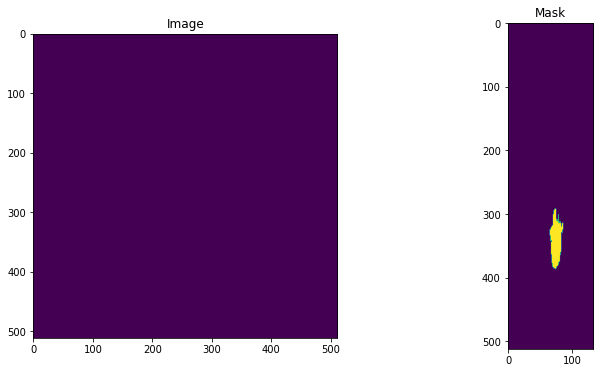

In [41]:
import nibabel as nib

test_image=nib.load(all_images).get_data()
test_mask=nib.load(all_masks).get_data()

test_image = np.rot90(test_image, 1, axes=(0,2))
test_mask = np.rot90(test_mask, 1, axes=(0,2))

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(test_image[test_image.shape[0]//2])
ax1.set_title('Image')

ax2.imshow(test_mask[test_image.shape[0]//2])
ax2.set_title('Mask')

plt.show()

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


TypeError: Invalid shape (512, 512, 134) for image data

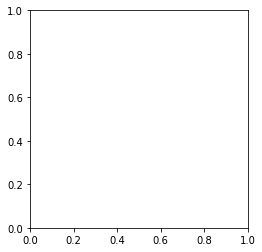

In [42]:
img = nib.load(f"{niftypath}/rtstructtest.nii")
data = img.get_fdata()
print(data)

from matplotlib import pyplot as plt
plt.imshow(data)
plt.show()